# Tutorial de Matplotlib: 6. Animaciones

Creado y traducido por [Pedro González Rodelas](https://www.ugr.es/~prodelas/) a partir de un notebook incluido en el siguiente [Tutorial de Matplotlib de astroML](http://jakevdp.github.io/mpl_tutorial/index.html)

        Última revisión: 10/04/2020

`Matplotlib` también posee una infraestructura que permite realizar animaciones: los ejemplos siguientes funcionarán con las nuevas versiones de dicho módulo. No obstante, esta infraestructura será independiente del backend gráfico usado para generar estas animaciones, siendo bastante potente y versátil (para revisar algunos ejemplos interesantes, puede consultar alguno de los posts del siguiente [blog](http://jakevdp.github.com/blog/2012/08/18/matplotlib-animation-tutorial/) o bien [este](http://jakevdp.github.com/blog/2012/09/05/quantum-python/))

De momento tan sólo crearemos algún ejemplo básico de una onda sinusoidal animada.

En este caso será vital **no** usar pylab en modo `inline`, ya que por defecto las figuras `inline` son estáticas.

In [1]:
# Como siempre, empezaremos importando los módulos habituales
import numpy as np
import matplotlib.pyplot as plt
# aparte del módulo específico de animación de matplotlib
from matplotlib.animation import *
plt.isinteractive()     # nos aseguramos de que estemos en modo interactivo

True

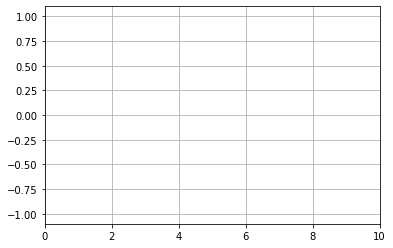

In [4]:
def data_gen():
    for cnt in range(1000):
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

anim = FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()

In [7]:
anim.save('animacion_1.avi', fps=30, codec='libx264')
anim.save('animacion_1.mp4', fps=30, codec='libx264')

Hay diferentes maneras de generar la animación; por ejemplo  ``ArtistAnimation`` anima una lista de elementos gráficos, mostrando sólo uno cada vez.  ``TimedAnimation`` puede ser generado a partir de subclases para crear animaciones muy flexibles.  ``FuncAnimation`` creará las animaciones usando una función definida por el usuario que actualizará los elementos de la animación frame a frame. Usaremos ``FuncAnimation`` a continuación, ya que esto hará más claro cómo funciona.

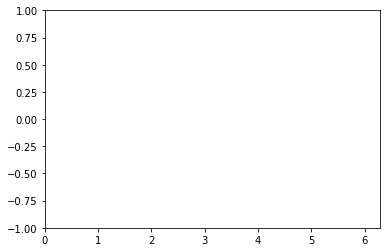

In [9]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

anim = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [10]:
anim.save('animacion_2.avi', fps=30, codec='libx264')
anim.save('animacion_2.mp4', fps=30, codec='libx264')

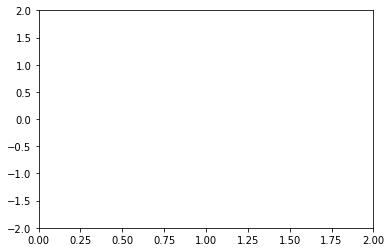

In [11]:
# En primer lugar configuraremos la figura, el eje, 
fig, ax = plt.subplots()  # y el elemento gráfico que queremos animar
ax.set_xlim(0, 2)
ax.set_ylim(-2, 2)

x = np.linspace(0, 2, 1000)
y = np.zeros_like(x)

line, = ax.plot(x, y, lw=2)

# función de inicialización: mostrando el fondo de cada frame
def init():
    line.set_data([], [])
    return line,

# función de animación, que será llamada secuencialmente
def animate(i):
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# llamando al animador con las opciones indicadas
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
#  como blit=True para que redibuje sólo las partes que cambien.
plt.show()

También podríamos generar una animacion y grabarla en formato mp4. Esto requiere el uso de `ffmpeg` o `mencoder` por lo que alguno de ellos debería estar correctamente instalado en el sistema. El argumento de codec asegurará que usaremos un code x264, de manera que el video final pueda ser embebido en html5. Para ello, si necesita ajustarlo en sus sistema, puede revisar la siguiente [informacion](http://matplotlib.sourceforge.net/api/animation_api.html)

In [12]:
anim.save('animacion_3.avi', fps=30, codec='libx264')
anim.save('animacion_3.mp4', fps=30, codec='libx264')

In [13]:
%pwd

'C:\\Users\\Usuario\\Dropbox (DropBox Básico)\\Cursos\\Python\\Centro Mediterráneo\\Sesiones\\Sesión 4\\MatplotlibTutorial'

In [14]:
%ls *.avi

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 8AEE-E6FD

 Directorio de C:\Users\Usuario\Dropbox (DropBox B sico)\Cursos\Python\Centro Mediterr neo\Sesiones\Sesi¢n 4\MatplotlibTutorial

10/04/2020  03:19            28.246 animacion_1.avi
10/04/2020  03:20            19.886 animacion_2.avi
10/04/2020  03:20            52.092 animacion_3.avi
10/04/2020  03:15            52.092 basic_animation.avi
               4 archivos        152.316 bytes
               0 dirs  384.132.321.280 bytes libres


**Ejercicio:** Modifique el código anterior para añadir una segunda onda que viaje hacia la izquierda, en vez de hacia la derecha.